## 라이브러리 import

In [1]:
import time # 걸리는 시간 확인
import pandas as pd # 데이터 분석
import numpy as np # 수치 계산
from glob import glob # 파일 경로 확인
from dask import dataframe as dd # dask로 대용량 파일 로드
from dask.diagnostics import ProgressBar # dask progress bar

pbar = ProgressBar()
pbar.register()

In [5]:
files = glob('data/*.parquet.gzip')
files

['data/sub-df-7.parquet.gzip',
 'data/sub-df-0.parquet.gzip',
 'data/sub-df-1.parquet.gzip',
 'data/sub-df-6.parquet.gzip',
 'data/2019-Oct-Nov.parquet.gzip',
 'data/sub-df-4.parquet.gzip',
 'data/sub-df-3.parquet.gzip',
 'data/sub-df-2.parquet.gzip',
 'data/sub-df-5.parquet.gzip']

In [6]:
file_name = files[4]
file_name

'data/2019-Oct-Nov.parquet.gzip'

In [7]:
df = pd.read_parquet(file_name)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
109950738,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,None,None,277.739990,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
109950739,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.810001,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
109950740,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.029999,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
109950741,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.270020,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


## 분석 대상 선정 EDA
- 분석 대상 세분화를 위한 EDA
- event 발생 수, price 합계 등을 기준으로 Brand 정렬

위의 기준으로 보았을 때, samsung과 apple이 타 Brand 들에 비해 압도적으로 상위권에 있음을 알 수 있으며 이 두 가지 브랜드를 대상으로 RFM 분석을 진행

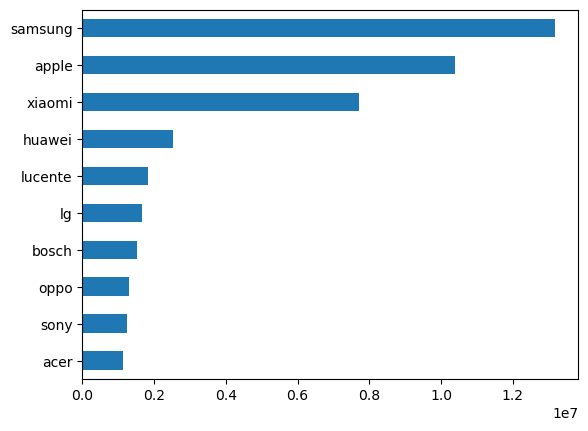

In [29]:
# 발생 event 발생 수 기준 상위 10개  Brand
df['brand'].value_counts(ascending=True).tail(10).plot.barh();

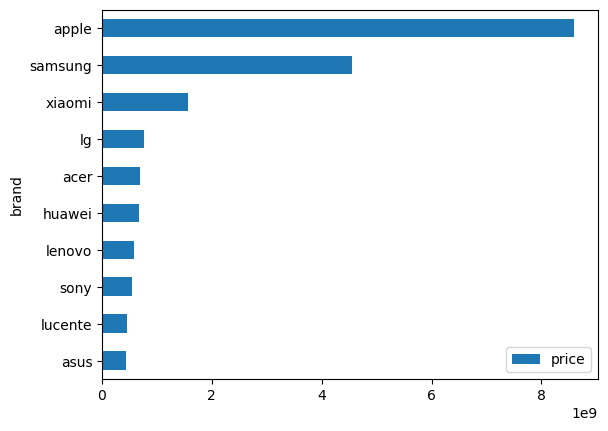

In [40]:
# price 합계 기준 상위 10개 Brand
df.groupby('brand').agg({'price' : 'sum'}).sort_values(by='price', ascending=True).tail(10).plot.barh();

In [8]:
# brand 값 samsung
samsung = df[df['brand'] == 'samsung']
samsung

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
11,2019-10-01 00:00:11 UTC,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.640015,530282093,50a293fb-5940-41b2-baf3-17af0e812101
45,2019-10-01 00:00:35 UTC,view,3601505,2053013563810775923,appliances.kitchen.washer,samsung,463.149994,526631741,5ec9bd77-beef-443e-b987-62ffb55b8132
49,2019-10-01 00:00:36 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,254.820007,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed
66,2019-10-01 00:00:55 UTC,view,1004659,2053013555631882655,electronics.smartphone,samsung,787.179993,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed
68,2019-10-01 00:00:57 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,388.809998,555447651,c3240a5e-6cb8-4d78-9732-a63c608444ef
...,...,...,...,...,...,...,...,...,...
109950714,2019-11-30 23:59:47 UTC,view,1003911,2053013555631882655,electronics.smartphone,samsung,177.100006,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d
109950719,2019-11-30 23:59:50 UTC,view,1700652,2053013553031414015,computers.peripherals.monitor,samsung,96.779999,579962208,b12833a5-9770-4527-9dfe-ce6d1fe070c4
109950730,2019-11-30 23:59:54 UTC,view,1005174,2053013555631882655,electronics.smartphone,samsung,591.750000,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb
109950740,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.029999,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb


In [9]:
# brand 값 apple
apple = df[df['brand'] == 'apple']
apple

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
19,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.790039,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.770020,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
25,2019-10-01 00:00:24 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.770020,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
51,2019-10-01 00:00:41 UTC,view,1003141,2053013555631882655,electronics.smartphone,apple,382.970001,551377651,ca11a570-47da-4630-898b-9a03127703da
...,...,...,...,...,...,...,...,...,...
109950687,2019-11-30 23:59:38 UTC,view,1005105,2053013555631882655,electronics.smartphone,apple,1302.479980,561181104,b2c61552-576c-4532-8d1e-ad2a0a9334d4
109950693,2019-11-30 23:59:40 UTC,view,4804718,2053013554658804075,electronics.audio.headphone,apple,329.140015,579969767,e159d1a1-6668-4777-985d-26ac82afd9ba
109950695,2019-11-30 23:59:41 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,810.830017,579969045,ee246970-62cb-4105-a049-703cdaee3a26
109950731,2019-11-30 23:59:54 UTC,view,1005118,2053013555631882655,electronics.smartphone,apple,925.469971,579969045,ee246970-62cb-4105-a049-703cdaee3a26


## 데이터 프레임 저장하기

In [47]:
samsung.to_parquet('data/brand-samsung.parquet.gzip', compression='gzip', index=False)
df_samsung = pd.read_parquet('data/brand-samsung.parquet.gzip')
df_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13172020 entries, 0 to 13172019
Data columns (total 9 columns):
 #   Column         Dtype   
---  ------         -----   
 0   event_time     object  
 1   event_type     category
 2   product_id     uint32  
 3   category_id    uint64  
 4   category_code  object  
 5   brand          object  
 6   price          float32 
 7   user_id        uint32  
 8   user_session   object  
dtypes: category(1), float32(1), object(4), uint32(2), uint64(1)
memory usage: 665.8+ MB


In [48]:
apple.to_parquet('data/brand-apple.parquet.gzip', compression='gzip', index=False)
df_apple = pd.read_parquet('data/brand-apple.parquet.gzip')
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10381933 entries, 0 to 10381932
Data columns (total 9 columns):
 #   Column         Dtype   
---  ------         -----   
 0   event_time     object  
 1   event_type     category
 2   product_id     uint32  
 3   category_id    uint64  
 4   category_code  object  
 5   brand          object  
 6   price          float32 
 7   user_id        uint32  
 8   user_session   object  
dtypes: category(1), float32(1), object(4), uint32(2), uint64(1)
memory usage: 524.8+ MB


In [49]:
display(df_samsung.head(), df_apple.head())

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:11 UTC,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.640015,530282093,50a293fb-5940-41b2-baf3-17af0e812101
1,2019-10-01 00:00:35 UTC,view,3601505,2053013563810775923,appliances.kitchen.washer,samsung,463.149994,526631741,5ec9bd77-beef-443e-b987-62ffb55b8132
2,2019-10-01 00:00:36 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,254.820007,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed
3,2019-10-01 00:00:55 UTC,view,1004659,2053013555631882655,electronics.smartphone,samsung,787.179993,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed
4,2019-10-01 00:00:57 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,388.809998,555447651,c3240a5e-6cb8-4d78-9732-a63c608444ef


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
1,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.790039,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
2,2019-10-01 00:00:20 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.770020,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
3,2019-10-01 00:00:24 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.770020,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
4,2019-10-01 00:00:41 UTC,view,1003141,2053013555631882655,electronics.smartphone,apple,382.970001,551377651,ca11a570-47da-4630-898b-9a03127703da
